In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
%matplotlib inline

In [3]:
data_path = '/Users/pvithayathil/homebound/kaggle-competitions/fake-real-news/data/processed/'


In [4]:
df_train=pd.read_csv(data_path+'/train.csv')

In [5]:
df_train_target=pd.read_csv(data_path+'/train_target.csv')

In [6]:
df_train['is_real'] = df_train_target['is_real']

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35918 entries, 0 to 35917
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    35918 non-null  object
 1   text     35918 non-null  object
 2   subject  35918 non-null  object
 3   date     35918 non-null  object
 4   is_real  35918 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df_train.head()

,title,text,subject,date,is_real
0,Korean seismic activity took place 50 km from ...,ZURICH (Reuters) - The nuclear proliferation w...,worldnews,"September 23, 2017",1
1,China calls for restraint when asked about Nor...,BEIJING (Reuters) - China called on all partie...,politicsNews,"September 22, 2017",1
2,“Would You Rather Do A Job You Hate And Not Pa...,"Filmmaker and patriot, Dennis Michael Lynch is...",Government News,"Feb 12, 2017",0
3,BRILLIANT! LT COL TONY SHAFFER: How Trump Shou...,Former CIA analyst and retired U.S. Army Reser...,left-news,"May 17, 2017",0
4,Brexit bill row to last the length of Brexit t...,LONDON (Reuters) - A row over how much money B...,worldnews,"September 5, 2017",1


In [10]:
import nltk

In [23]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pvithayathil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pvithayathil/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [14]:
import re

In [15]:
import re
from nltk.corpus import stopwords

In [16]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [19]:
df_train['title_and_text'] = df_train['title'] + ' ' + df_train['text']

In [21]:
df_train.isnull().sum()

title             0
text              0
subject           0
date              0
is_real           0
title_and_text    0
dtype: int64

In [27]:
df_train.groupby(['is_real'])['text'].count().reset_index()

,is_real,text
0,0,18810
1,1,17108


In [26]:
df_train.groupby(['subject'])['text'].count().reset_index()

,subject,text
0,Government News,1273
1,Middle-east,616
2,News,7218
3,US_News,617
4,left-news,3563
5,politics,5523
6,politicsNews,9005
7,worldnews,8103


In [24]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return result

#### Stop Words

In [29]:
df_train['clean_title'] = df_train['title'].apply(preprocess)

In [34]:
df_train['clean_title'][2]

['job',
 'hate',
 'pay',
 'taxes',
 'illegals',
 'answer',
 'question',
 'tells',
 'need',
 'know',
 'help',
 'economy',
 'video']

In [36]:
df_train['clean_joined_title']=df_train['clean_title'].apply(lambda x:" ".join(x))

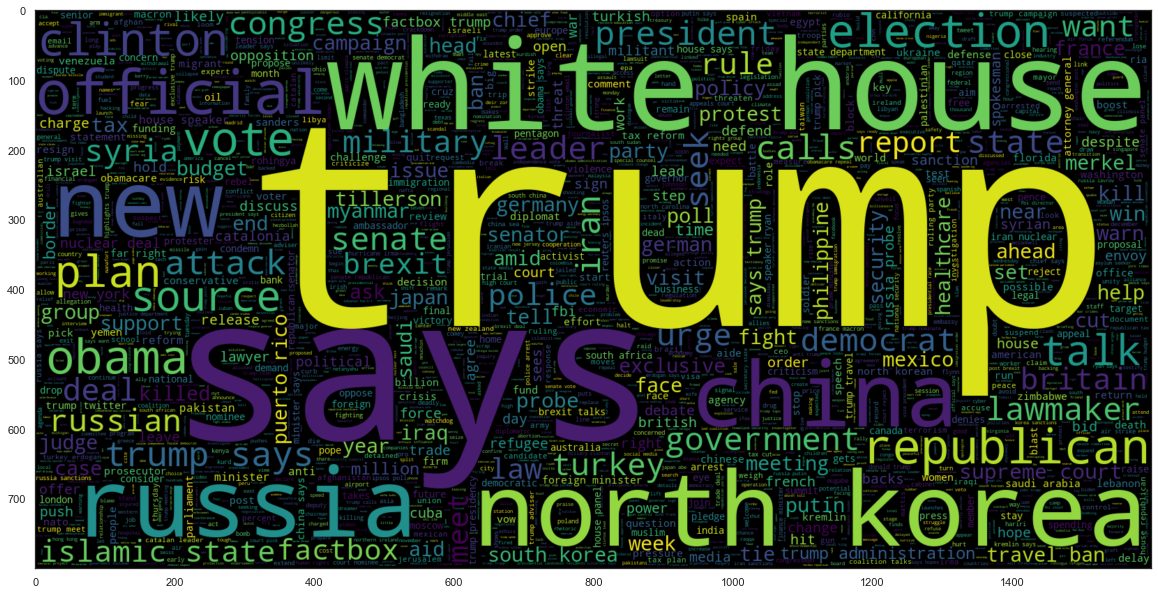

In [38]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df_train[df_train['is_real'] == 1].clean_joined_title))
plt.imshow(wc, interpolation = 'bilinear')

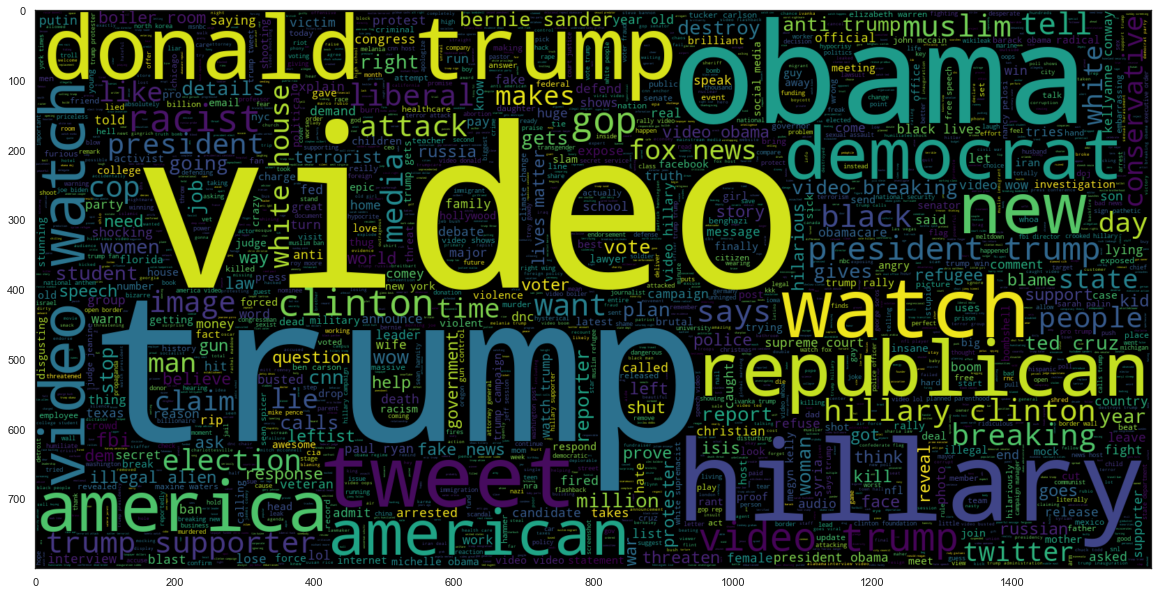

In [39]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df_train[df_train['is_real'] == 0].clean_joined_title))
plt.imshow(wc, interpolation = 'bilinear')

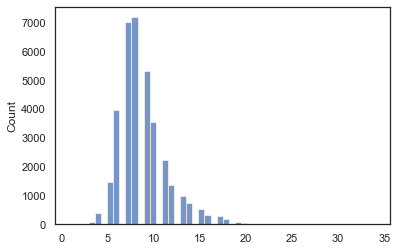

In [45]:
maxlen = -1
for doc in df_train.clean_joined_title:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
fig = sns.histplot(x = [len(nltk.word_tokenize(x)) for x in df_train.clean_joined_title], bins = 50)


In [47]:
gensim.parsing.preprocessing.STOPWORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'